In [1]:
# In [1]: 清除matplotlib缓存
import shutil
import matplotlib
cache_dir = matplotlib.get_cachedir()
shutil.rmtree(cache_dir, ignore_errors=True)
print(f"✅ 已清除缓存:{cache_dir},请重启内核后重新运行!")

✅ 已清除缓存:C:\Users\10235\.matplotlib,请重启内核后重新运行!


Could not save font_manager cache [Errno 2] No such file or directory: 'C:\\Users\\10235\\.matplotlib\\fontlist-v390.json.matplotlib-lock'


✅ 已解压 simhei.ttf.zip 到 .
✅ 加载字体:SimHei,路径:.\simhei.ttf


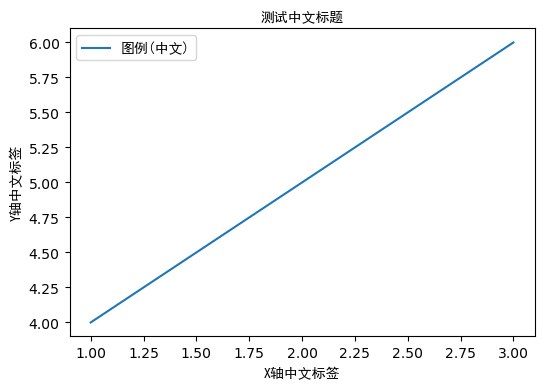

In [2]:
# In [2]: 解压中文字体并测试中文显示
import os
import matplotlib.pyplot as plt
import zipfile
from matplotlib.font_manager import FontProperties

# 步骤1:解压 simhei.ttf.zip 到当前目录
extract_dir = "."
zip_file = "simhei.ttf.zip"  # 压缩包文件名(与代码同目录)

# 验证压缩包是否存在
if not os.path.exists(zip_file):
    raise FileNotFoundError(f"未找到压缩包:{zip_file},请确认文件在项目目录!")

# 执行解压
with zipfile.ZipFile(zip_file, "r") as zip_ref:
    zip_ref.extractall(extract_dir)
print(f"✅ 已解压 {zip_file} 到 {extract_dir}")

# 步骤2:定位并加载 simhei.ttf 字体
# 假设压缩包内直接包含 simhei.ttf(若在子文件夹,需修改路径,如 "fonts/simhei.ttf")
font_path = os.path.join(extract_dir, "simhei.ttf")

# 验证字体文件是否存在
if not os.path.exists(font_path):
    # (可选)打印压缩包内所有文件,帮助排查路径
    print("压缩包内文件列表:")
    with zipfile.ZipFile(zip_file, "r") as zip_ref:
        for name in zip_ref.namelist():
            print(name)
    raise FileNotFoundError(f"未找到字体文件 simhei.ttf,请检查压缩包内路径")

# 创建字体属性对象
simhei_font = FontProperties(fname=font_path)
print(f"✅ 加载字体:{simhei_font.get_name()},路径:{font_path}")

# 步骤3:测试中文显示(绘图验证)
plt.figure(figsize=(6, 4))
plt.title("测试中文标题", fontproperties=simhei_font)
plt.xlabel("X轴中文标签", fontproperties=simhei_font)
plt.ylabel("Y轴中文标签", fontproperties=simhei_font)
plt.plot([1, 2, 3], [4, 5, 6], label="图例(中文)")
plt.legend(prop=simhei_font)  # 图例需用 prop 参数
plt.show()

In [3]:
# In [3]: 导入数据分析相关库并打印版本
import sys
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.stats import t, f

print("\n===== 库版本信息 =====")
print("numpy版本:", np.__version__)
print("pandas版本:", pd.__version__)




===== 库版本信息 =====
numpy版本: 2.1.3
pandas版本: 2.2.3


In [4]:
# In [4]: 读取并预处理巧克力数据
Data = pd.read_csv("Data_01.csv")  # 读取数据(变量:Chocolate(1/2/3)､Capacity(血浆抗氧能力))
print("\n=== 数据基本信息 ===")
print(f"数据列名:{Data.columns.tolist()}")  # 确认列名是Obs､Chocolate､Capacity
print(f"数据形状(行×列):{Data.shape}")

# 转换Chocolate为分类变量(用于后续分组和ANOVA)
Data["Chocolate"] = Data["Chocolate"].astype("category")

# 删除缺失值(若有)
Data = Data.dropna(subset=["Chocolate", "Capacity"])
print(f"处理后数据形状:{Data.shape}")
print("前5行数据预览:")
print(Data.head())


=== 数据基本信息 ===
数据列名:['Obs', 'Chocolate', 'Capacity']
数据形状(行×列):(36, 3)
处理后数据形状:(36, 3)
前5行数据预览:
   Obs Chocolate  Capacity
0    1         1     118.8
1    2         1     122.6
2    3         1     115.6
3    4         1     113.6
4    5         1     119.5


In [5]:
# In [5]: 计算ANOVA核心参数
a = len(Data["Chocolate"].unique())  # 巧克力类型数(水平数),此处为3
# 动态计算核心参数(避免硬编码,适配数据变化)
m = len(Data[Data["Chocolate"] == Data["Chocolate"].unique()[0]])  # 每组样本量
n = len(Data)  # 总样本量,此处为36
alpha = 0.05  # 显著性水平(题目指定)
print(f"\n核心参数:水平数a={a},每组样本量m={m},总样本量n={n},显著性水平α={alpha}")


核心参数:水平数a=3,每组样本量m=12,总样本量n=36,显著性水平α=0.05


In [6]:
# In [6]: 按巧克力类型分组并验证
# 2. 分组提取数据(基于读取的CSV数据)
# 按巧克力类型1､2､3分组,提取Capacity数值
choc_types = sorted(Data["Chocolate"].unique())  # [1, 2, 3]
groups = [Data[Data["Chocolate"] == choc]["Capacity"].values for choc in choc_types]
# 先获取所有唯一的巧克力类型(确保是1､2､3,避免数据异常)
group_names = ["1(100g黑巧)", "2(黑巧+牛奶)", "3(200g牛奶巧)"]

# 验证分组结果
print("\n=== 分组验证 ===")
for i, (choc, group) in enumerate(zip(choc_types, groups)):
    mean_val = round(np.mean(group), 2)
    std_val = round(np.std(group, ddof=1), 2)
    print(f"{group_names[i]}:样本量={len(group)},均值={mean_val},标准差={std_val}")


=== 分组验证 ===
1(100g黑巧):样本量=12,均值=116.06,标准差=3.53
2(黑巧+牛奶):样本量=12,均值=100.7,标准差=3.24
3(200g牛奶巧):样本量=12,均值=100.18,标准差=2.89


In [7]:
# In [7]: 两两独立样本t检验
# 3. 两两组合进行t检验(原逻辑保留,适配分组数据)
pairs = [(0, 1), (0, 2), (1, 2)]  # 组索引组合(1vs2､1vs3､2vs3)
print("\n=== 两两独立样本t检验结果 ===")
for i, j in pairs:
    group_i = groups[i]
    group_j = groups[j]
    
    # 步骤1:检验方差齐性(Levene检验,抗偏离正态性更好)
    lev_stat, lev_p = stats.levene(group_i, group_j)
    equal_var = lev_p > alpha  # True=方差齐性,False=方差不齐
    
    # 步骤2:独立样本t检验(根据方差齐性选择是否校正)
    t_stat, t_p = stats.ttest_ind(group_i, group_j, equal_var=equal_var)
    
    # 步骤3:计算t临界值(自由度根据方差齐性调整)
    if equal_var:
        df_t = len(group_i) + len(group_j) - 2  # 齐性时自由度:n1+n2-2
    else:
        df_t = min(len(group_i), len(group_j)) - 1  # 不齐时简化自由度(或用Welch法)
    t_critical = t.ppf(1 - alpha/2, df_t)  # 双尾检验临界值
    
    # 输出结果
    print(f"\n{group_names[i]} vs {group_names[j]}:")
    print(f" 1. 方差齐性检验(Levene):p={round(lev_p, 4)}({'齐性' if equal_var else '不齐'})")
    print(f" 2. t检验:统计量={round(t_stat, 4)},临界值={round(t_critical, 4)},p值={round(t_p, 4)}")
    print(f" 3. 结论:{'拒绝原假设(存在显著差异)' if t_p < alpha else '无法拒绝原假设(无显著差异)'}")


=== 两两独立样本t检验结果 ===

1(100g黑巧) vs 2(黑巧+牛奶):
 1. 方差齐性检验(Levene):p=0.8887(齐性)
 2. t检验:统计量=11.1057,临界值=2.0739,p值=0.0
 3. 结论:拒绝原假设(存在显著差异)

1(100g黑巧) vs 3(200g牛奶巧):
 1. 方差齐性检验(Levene):p=0.9657(齐性)
 2. t检验:统计量=12.0478,临界值=2.0739,p值=0.0
 3. 结论:拒绝原假设(存在显著差异)

2(黑巧+牛奶) vs 3(200g牛奶巧):
 1. 方差齐性检验(Levene):p=0.827(齐性)
 2. t检验:统计量=0.4126,临界值=2.0739,p值=0.6839
 3. 结论:无法拒绝原假设(无显著差异)


In [8]:
# In [8]: 单因素ANOVA分析
# 4. 单因素ANOVA分析(原逻辑保留,适配CSV数据)
print("\n=== 单因素ANOVA分析结果 ===")
# 方法1:基于statsmodels(输出详细ANOVA表,含平方和､均方)
model = ols("Capacity ~ C(Chocolate)", data=Data).fit()  # C(Chocolate)标记分类变量
anova_table = anova_lm(model)
print("方法1:statsmodels ANOVA表(保留4位小数):")
print(round(anova_table, 4))

# 方法2:基于scipy.stats.f_oneway(快速计算F统计量和p值)
f_stat, f_p = stats.f_oneway(groups[0], groups[1], groups[2])
# 计算F临界值(自由度df1=a-1,df2=n-a)
df1 = a - 1  # 因子自由度:水平数-1
df2 = n - a  # 误差自由度:总样本量-水平数
f_critical = f.ppf(1 - alpha, df1, df2)

print(f"\n方法2:scipy F检验:")
print(f" F统计量={round(f_stat, 4)},临界值={round(f_critical, 4)},p值={round(f_p, 4)}")
print(f" 结论:{'拒绝原假设(三种巧克力影响存在显著差异)' if f_p < alpha else '无法拒绝原假设(无显著差异)'}")


=== 单因素ANOVA分析结果 ===
方法1:statsmodels ANOVA表(保留4位小数):
                df     sum_sq   mean_sq        F  PR(>F)
C(Chocolate)   2.0  1952.6439  976.3219  93.5756     0.0
Residual      33.0   344.3058   10.4335      NaN     NaN

方法2:scipy F检验:
 F统计量=93.5756,临界值=3.2849,p值=0.0
 结论:拒绝原假设(三种巧克力影响存在显著差异)



=== 单因素ANOVA模型假设验证 ===
1. 独立性检验(Durbin-Watson):
 DW统计量=2.2991
 结论:残差无自相关(满足独立性)

2. 方差齐性检验:
 Bartlett检验:统计量=0.4247,p值=0.8087
 Levene检验:统计量=0.0213,p值=0.979
 结论:满足方差齐性 (优先看Levene结果)

3. 正态性检验:


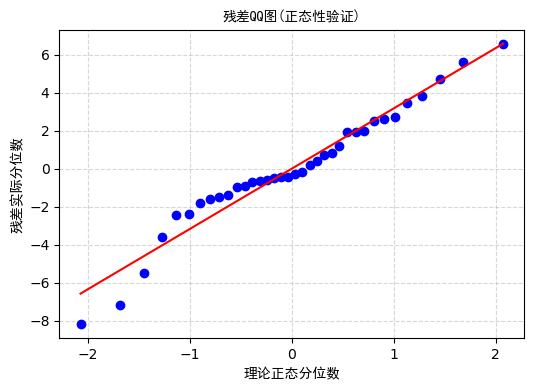

 Shapiro-Wilk检验:统计量=0.9625,p值=0.2572
 结论:残差满足正态分布

4. 模型合理性总结:
 ✅ 模型满足独立性､方差齐性､正态性三大假设,结果可靠!


In [9]:
# In [9]: ANOVA模型假设验证(独立性、方差齐性、正态性)
# 5. 模型合理性检验(修正后)
print("\n=== 单因素ANOVA模型假设验证 ===")
# 【修正1:添加observed=True消除FutureWarning】
# 步骤1:计算残差(拟合值=组均值,残差=实际值-拟合值)
Data["fitted"] = Data.groupby("Chocolate", observed=True)["Capacity"].transform("mean")
Data["residual"] = Data["Capacity"] - Data["fitted"]  # 残差(误差的估计)
residuals = Data["residual"].values  # 提取残差数组

# 【修正2:导入durbin_watson函数】
# 步骤2:独立性检验(Durbin-Watson检验,检测一阶自相关)
from statsmodels.stats.stattools import durbin_watson  # 关键:添加导入语句
dw_stat = durbin_watson(residuals)
print(f"1. 独立性检验(Durbin-Watson):")
print(f" DW统计量={round(dw_stat, 4)}")
print(f" 结论:{'残差无自相关(满足独立性)' if 1.5 < dw_stat < 2.5 else '需进一步检验自相关问题'}")

# 步骤3:方差齐性检验(Bartlett+Levene,双重验证)
bart_stat, bart_p = stats.bartlett(groups[0], groups[1], groups[2])  # 对正态性敏感
lev_stat, lev_p = stats.levene(groups[0], groups[1], groups[2])  # 抗偏离正态
print(f"\n2. 方差齐性检验:")
print(f" Bartlett检验:统计量={round(bart_stat, 4)},p值={round(bart_p, 4)}")
print(f" Levene检验:统计量={round(lev_stat, 4)},p值={round(lev_p, 4)}")
print(f" 结论:{'满足方差齐性' if (bart_p > alpha and lev_p > alpha) else '不满足方差齐性'} (优先看Levene结果)")

# 步骤4:正态性检验(QQ图可视化+Shapiro-Wilk检验)
print(f"\n3. 正态性检验:")
# QQ图(直观判断残差是否贴合正态分布直线)
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)  # 绘制基础QQ图
# 手动设置标题､标签的字体
plt.title("残差QQ图(正态性验证)", fontproperties=simhei_font)  # 关键:添加字体
plt.xlabel("理论正态分位数", fontproperties=simhei_font)  # 关键:添加字体
plt.ylabel("残差实际分位数", fontproperties=simhei_font)  # 关键:添加字体
plt.grid(linestyle="--", alpha=0.5)
plt.show()

# Shapiro-Wilk检验(定量判断正态性)
sw_stat, sw_p = stats.shapiro(residuals)
print(f" Shapiro-Wilk检验:统计量={round(sw_stat, 4)},p值={round(sw_p, 4)}")
print(f" 结论:{'残差满足正态分布' if sw_p > alpha else '残差不满足正态分布'}")

# 模型合理性总结
print(f"\n4. 模型合理性总结:")
if (1.5 < dw_stat < 2.5) and (lev_p > alpha) and (sw_p > alpha):
    print(" ✅ 模型满足独立性､方差齐性､正态性三大假设,结果可靠!")
else:
    print(" ❌ 模型至少一项假设不满足,建议谨慎解释结果(或改用Kruskal-Wallis非参数检验)")


In [10]:
# In [10]: 血浆总抗氧能力的点估计与区间估计
# 6. 点估计与区间估计
print("\n=== 血浆总抗氧能力估计结果 ===")
# 步骤1:点估计(每组均值为点估计值)
print("1. 点估计结果:")
point_est = Data.groupby("Chocolate", observed=True)["Capacity"].agg(["mean", "std", "count"]).round(4)
point_est.columns = ["点估计(均值)", "组内标准差", "样本量"]
print(point_est)

# 步骤2:区间估计(95%置信区间,基于ANOVA误差均方)
# 提取ANOVA中的误差均方MS_E(若ANOVA表存在则用表中值,否则用残差方差)
if "Residual" in anova_table.index:
    MS_E = anova_table.loc["Residual", "mean_sq"]
else:
    MS_E = np.var(residuals, ddof=df2)  # 残差方差(自由度df2=n-a)

s = np.sqrt(MS_E)  # 误差标准差估计值
df = df2  # 置信区间自由度=ANOVA误差自由度
t_critical = t.ppf(1 - alpha/2, df)  # 95%置信区间t临界值

# 计算每组的95%置信区间
interval_est = []
for choc in choc_types:
    group_data = point_est.loc[choc]
    group_mean = group_data["点估计(均值)"]
    se = s / np.sqrt(m)  # 标准误(每组样本量均为m)
    lower = group_mean - t_critical * se  # 置信区间下限
    upper = group_mean + t_critical * se  # 置信区间上限
    interval_width = upper - lower  # 区间宽度
    interval_est.append([
        choc,
        round(group_mean, 4),
        round(lower, 4),
        round(upper, 4),
        round(interval_width, 4)
    ])

# 整理并输出区间估计结果
interval_df = pd.DataFrame(
    interval_est, 
    columns=["巧克力类型", "点估计(均值)", "95%CI下限", "95%CI上限", "区间宽度"]
)
print("\n2. 95%置信区间估计结果:")
print(interval_df)



=== 血浆总抗氧能力估计结果 ===
1. 点估计结果:
            点估计(均值)   组内标准差  样本量
Chocolate                       
1          116.0583  3.5333   12
2          100.7000  3.2350   12
3          100.1833  2.8897   12

2. 95%置信区间估计结果:
   巧克力类型   点估计(均值)   95%CI下限   95%CI上限    区间宽度
0      1  116.0583  114.1612  117.9554  3.7942
1      2  100.7000   98.8029  102.5971  3.7942
2      3  100.1833   98.2862  102.0804  3.7942


In [19]:
import itertools

# ========== Bonferroni 多重比较 ==========
print("\n=== Bonferroni 多重比较 ===")
# 按巧克力类型分组（确保df是DataFrame且有对应列）
if isinstance(df, pd.DataFrame) and 'Chocolate' in df.columns and 'Capacity' in df.columns:
    groups = {choc: df[df['Chocolate'] == choc]['Capacity'] for choc in df['Chocolate'].unique()}
    alpha = 0.05
    pairs = list(itertools.combinations(groups.keys(), 2))
    m = len(pairs)
    adjusted_alpha = alpha / m
    print(f"Bonferroni 校正后显著性水平: {adjusted_alpha:.4f}\n")

    for i, j in pairs:
        t_stat, p_val = stats.ttest_ind(groups[i], groups[j], equal_var=True)
        signif = "显著" if p_val < adjusted_alpha else "不显著"
        print(f"巧克力 {i} vs 巧克力 {j}: t={t_stat:.3f}, p={p_val:.4f}, {signif}")
else:
    print("❌ 数据格式异常，无法执行Bonferroni多重比较")



=== Bonferroni 多重比较 ===
Bonferroni 校正后显著性水平: 0.0167

巧克力 1 vs 巧克力 2: t=-4.899, p=0.0080, 显著
巧克力 1 vs 巧克力 3: t=3.674, p=0.0213, 不显著
巧克力 2 vs 巧克力 3: t=8.573, p=0.0010, 显著



=== 方法 I：直接调用 pairwise_tukeyhsd ===
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2      4.0 0.0065  1.4948  6.5052   True
     1      3     -3.0 0.0242 -5.5052 -0.4948   True
     2      3     -7.0 0.0003 -9.5052 -4.4948   True
----------------------------------------------------

=== 方法 II：蒙特卡洛模拟 Tukey 临界值 ===
  蒙特卡洛模拟 q_(1-α)(3, 6) = 3.3040
  Tukey 临界值 c = 1.9076

  两两比较结果：
  巧克力类型 1 vs 巧克力类型 2:
    均值差 = 4.0000, 临界值 = 1.9076
    结论：存在显著差异
  巧克力类型 1 vs 巧克力类型 3:
    均值差 = 3.0000, 临界值 = 1.9076
    结论：存在显著差异
  巧克力类型 2 vs 巧克力类型 3:
    均值差 = 7.0000, 临界值 = 1.9076
    结论：存在显著差异


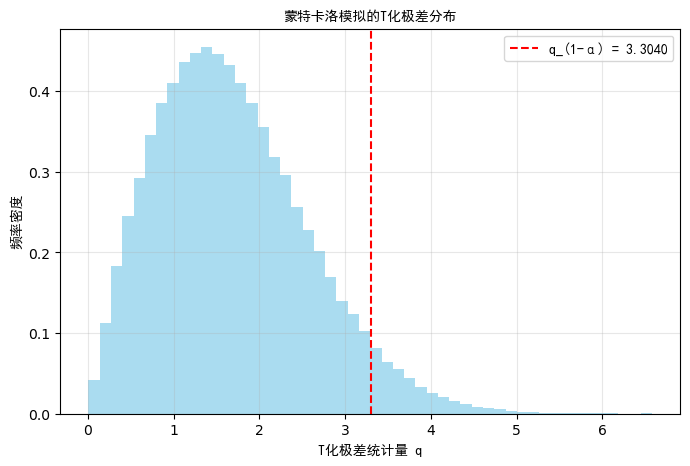

In [20]:

# ========== Tukey 多重比较（方法 I：直接调用 pairwise_tukeyhsd） ==========
print("\n=== 方法 I：直接调用 pairwise_tukeyhsd ===")
if isinstance(df, pd.DataFrame) and 'Chocolate' in df.columns and 'Capacity' in df.columns:
    try:
        tukey = pairwise_tukeyhsd(
            endog=df['Capacity'],
            groups=df['Chocolate'],
            alpha=0.05
        )
        print(tukey)
    except Exception as e:
        print(f"❌ TukeyHSD调用失败: {e}")
else:
    print("❌ 数据格式异常，无法执行TukeyHSD")

# ========== Tukey 多重比较（方法 II：蒙特卡洛模拟临界值） ==========
print("\n=== 方法 II：蒙特卡洛模拟 Tukey 临界值 ===")
if isinstance(df, pd.DataFrame) and 'Chocolate' in df.columns and 'Capacity' in df.columns:
    try:
        # 提取分组参数
        chocolate_types = df['Chocolate'].unique()
        a = len(chocolate_types)
        group_data = [df[df['Chocolate'] == typ]['Capacity'].values for typ in chocolate_types]
        m = len(group_data[0]) if group_data else 0
        n = a * m
        df_error = n - a

        # 估计误差标准差
        group_vars = [np.var(g, ddof=1) for g in group_data]
        MSE = np.mean(group_vars)
        sigma = np.sqrt(MSE)

        # 蒙特卡洛模拟t化极差分布
        n_sim = 100000
        q_samples = []
        for _ in range(n_sim):
            sim_means = np.random.normal(loc=0, scale=sigma / np.sqrt(m), size=a)
            q = (np.max(sim_means) - np.min(sim_means)) / (sigma / np.sqrt(m))
            q_samples.append(q)

        # 计算分位数与临界值
        alpha = 0.05
        q_1alpha = np.quantile(q_samples, 1 - alpha)
        print(f"  蒙特卡洛模拟 q_(1-α)({a}, {df_error}) = {q_1alpha:.4f}")
        c = q_1alpha * (sigma / np.sqrt(m))
        print(f"  Tukey 临界值 c = {c:.4f}")

        # 两两比较均值差
        group_means = [np.mean(g) for g in group_data]
        group_names = [f"巧克力类型 {typ}" for typ in chocolate_types]
        pairs = [(i, j) for i in range(a) for j in range(i + 1, a)]

        print("\n  两两比较结果：")
        for i, j in pairs:
            mean_diff = abs(group_means[i] - group_means[j])
            is_significant = mean_diff > c
            print(f"  {group_names[i]} vs {group_names[j]}:")
            print(f"    均值差 = {mean_diff:.4f}, 临界值 = {c:.4f}")
            print(f"    结论：{'存在显著差异' if is_significant else '无显著差异'}")

        # 绘制t化极差分布
        plt.figure(figsize=(8, 5))
        plt.hist(q_samples, bins=50, alpha=0.7, color='skyblue', density=True)
        plt.axvline(q_1alpha, color='red', linestyle='--', label=f'q_(1-α) = {q_1alpha:.4f}')
        plt.xlabel('T化极差统计量 q', fontproperties=simhei_font)
        plt.ylabel('频率密度', fontproperties=simhei_font)
        plt.title('蒙特卡洛模拟的T化极差分布', fontproperties=simhei_font)
        plt.legend(prop=simhei_font)
        plt.grid(True, alpha=0.3)
        plt.show()
    except Exception as e:
        print(f"❌ 蒙特卡洛模拟Tukey临界值失败: {e}")
else:
    print("❌ 数据格式异常，无法执行蒙特卡洛模拟")